In [1]:
import os
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Путь до папки с данными
os.chdir('/Users/tony/Desktop/msusums/')

In [4]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [3]:
# Фиксируем random_seed (не меняем этот параметр)!
SEED = 42

In [5]:
# Загружаем данные
data = pd.read_csv('train_data.csv')
ans = pd.read_csv('train_ans.csv')
data.shape, ans.shape

((5574703, 3), (57711, 2))

In [6]:
# [1 балл] Разделим данные на обучение и валидацию
# (должно получиться 2 непересекающихся датафрейма)

np.random.seed(SEED)
all_unq_users = np.unique(data.user)
train_users, test_users = np.split(
    np.random.permutation(all_unq_users), [int(len(all_unq_users) * 0.7)]
)

# Ваш код здесь:


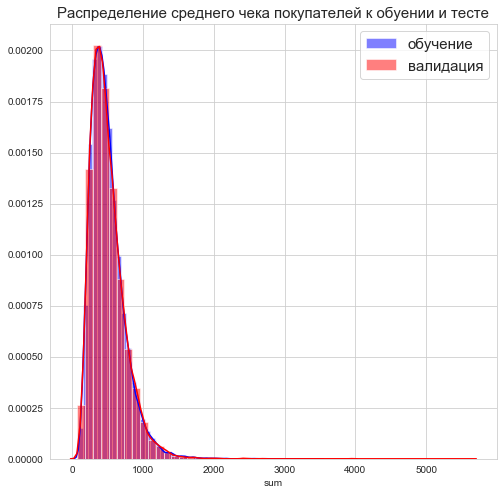

In [8]:
# [1 балл] Проверим, что разделение на обучение и валидацию случайное с точки зрения среднего чека пользователя
# Изобразите плотность распределение среднего чека покупателя для покупателей из обучения и из валидации

# Ваш код здесь:


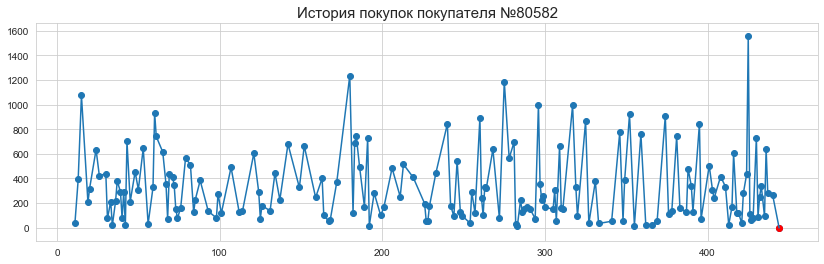

In [9]:
# [1 балл] Изобразите историю сумм покупок для какого-то покупателя
np.random.seed(SEED)
some_user = np.random.choice(all_unq_users)

# Ваш код здесь:


In [10]:
# [2 балла] Реализуйте функцию подсчёта мейпа (MAPE)
# Не забудьте учесть случай нулей в y_true

def mape(y_true: np.array, y_pred: np.array) -> float:
    
    """
    Подсчитывает MAPE по формуле: (1/n) * ∑ |y_true - y_pred| / |y_true|
    
    Args:
        y_true: np.array с истинными значениями таргета
        y_pred: np.array с предсказанными значениями
    Returns:
        MAPE (если в y_true есть нули, то такие наблюдения нужно выкинуть из рассчёта метрики)
    """
    
    # Ваш код здесь:
    
    
    return 

In [11]:
# [2 балла] Сделайте прогноз как среднюю стоимость покупки на истории и посчитайте его точность (MAPE) 
# (на обучении и на валидации)

# Ваш код здесь:


In [15]:
%%time
# [3 балла] Напишите функцию, которая переводит данные о продажах (такие как в data) в формат, удобный для модели, 
# а именно, вот в такой формат:
    #user   day0     day1    day2     day3  ... target    sum1   sum2    sum3  ...
    #0      438      437     435      433         20      555     3       40
    #1      398      438     437      315         93      104     409     143
    #...
# (числа в примере рандомные). day0 - день, на который нужно предсказать
    

def prepare_X(df: pd.DataFrame, ans: pd.DataFrame=None) -> pd.DataFrame:
    
    """
    Преобразует данные об истории продаж в удобный для модели формат. 
    Обязательно наличие у df колонок "user", "day" и "sum"
    
    Args:
        df - датафрейм с историей продаж
        ans - датафрейм с таргетами (обязательны колонки "user" и "sum"). Если ans не None, то в выходном
            датафрейме должен быть столбец target
    """
    
    # Ваш код здесь:
    
    
    return Xy

Xy = prepare_X(df=data, ans=ans)

CPU times: user 36.3 s, sys: 3.45 s, total: 39.8 s
Wall time: 47.9 s


In [26]:
# [1 балл] подберите оптимальное (критерий: MAPE) число соседей на валидации для метода KNN, где в качестве прогноза будем брать
# средние траты по k последним дням, в которых были покупки
n_neighbours = []
mapes_train = []
mapes_test = []

# Ваш код здесь:


n_neighbours = np.array(n_neighbours)
mapes_train = np.array(mapes_train)
mapes_test = np.array(mapes_test)

In [75]:
# [1 балл] Изобразите зависимость mapes_train от n_neighbours и mapes_test от n_neighbours

# Ваш код здесь:

### Весовые схемы

Реализуем различные весовые схемы:

1) $\tilde{w_{i}} = \left( \frac{d - i + 1}{d}  \right)^\delta, \ i \in \{1, 2, \dots, d   \}, \ \delta \in [0, +\infty)$

2) $\tilde{w_{i}} = \lambda^i, \ \lambda \in (0, 1]$

3) $\tilde{w_{i}} = \frac{1}{i^\gamma}, \ \gamma \in [0, +\infty)$

Итоговые веса должны быть нормированы: $\sum\limits_{i=1}^d w_{i} = 1$. Для этого просто поделим веса на сумму: $w_{i} = \frac{\tilde{w_{i}}}{\sum\limits_{i=1}^d\tilde{w_{i}}}$

In [29]:
# [3 балла] Реализуйте функции создание весов по схемам, описанным выше
# На выходе веса должны уже быть нормированными

def delta_weights(d: int, delta: float=1.0) -> np.array:
    # Ваш код здесь:
    return
    

def lamb_weights(d: int, lamb: float=1) -> np.array:
    # Ваш код здесь:
    return 

def gamma_weights(d: int, gamma: float=1) -> np.array:
    # Ваш код здесь:
    return 

In [30]:
# [1 балл] Подберите оптимальное значение параметра delta для первой весовой схемы. В качестве числа соседей 
# возьмите оптимальное число, найденное ранее

delta_list = []
mapes_train = []
mapes_test = []

# Ваш код здесь:

    
delta_list = np.array(delta_list)
mapes_train = np.array(mapes_train);
mapes_test = np.array(mapes_test);

In [79]:
# [1 балл] Изобразите зависимость mapes_train от delta_list и mapes_test от delta_list

# Ваш код здесь:


In [32]:
# [1 балл] Подберите оптимальное значение параметра lamb для второй весовой схемы. В качестве числа соседей 
# возьмите оптимальное число, найденное ранее.

lamba_list = []
mapes_train = []
mapes_test = []

# Ваш код здесь:
    
lamba_list = np.array(lamba_list)
mapes_train = np.array(mapes_train);
mapes_test = np.array(mapes_test);

In [82]:
# [1 балл] Изобразите зависимость mapes_train от lamba_list и mapes_test от lamba_list

# Ваш код здесь:


In [34]:
# [1 балл] Подберите оптимальное значение параметра gamma для третьей весовой схемы. В качестве числа соседей 
# возьмите оптимальное число, найденное ранее.

gamma_list = []
mapes_train = []
mapes_test = []

# Ваш код здесь:

    
gamma_list = np.array(gamma_list)
mapes_train = np.array(mapes_train);
mapes_test = np.array(mapes_test);

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [85]:
# [1 балл] Изобразите зависимость mapes_train от gamma_list и mapes_test от gamma_list

# Ваш код здесь:


### Дополнительные пункты

<ol>
    <li> [3 Балла]
        Попробуйте добавить признаков в модель (День недели, день месяца, номер месяца, расстояние до какой-то даты, ...). Увеличили ли они качество предсказания для Вашей модели?</li>
    <li> [3 Балла] Попробуйте отнестись к признаком дат как к категориальным и сделать для них энкодинги (label encoding, OHE, target encoding, ...). Какая кодировка приводит к наибольшему качеству?</li>
    <li> [4 Балла] В этом пункте у Вас нет ограничения по методикам и моделям - добейтесь максимального качества (минимальный MAPE) на валидации</li>
</ol>

### Получение предсказаний для теста

In [43]:
%%time
# Загружаем данные, для которых хотим получить предсказания
test_data = pd.read_csv('test_data.csv')

CPU times: user 14.5 s, sys: 792 ms, total: 15.3 s
Wall time: 14.8 s


In [48]:
# [1 балл] Получите предсказания для test_data (лучшей из моделей, которые Вы получили ранее) 
# и сохраните их в файл "test_predictions.csv" в той же папке.

# Ваш код здесь:


In [152]:
def plot_2d_separator(classifier, X, fill=False, twocolor=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1001)
    yy = np.linspace(y_min, y_max, 1001)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        try:
            decision_values = classifier.predict_proba(X_grid)[:, 1]
        except:
            decision_values = classifier.predict(X_grid)
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        c = decision_values.reshape(X1.shape)
        if twocolor:
            print (fill_levels)
            ax.contourf(X1, X2, c,
                        levels=fill_levels, colors=['#FF9999', '#0000FF'], alpha=0.2)
            ax.contour(X1, X2, c,
                       levels=np.linspace(c.min(), c.max(), 15), alpha=0.5, colors="white")             
            
        else:
            ax.contourf(X1, X2, c,
                        levels=np.linspace(c.min(), c.max(), 30), cmap=plt.cm.binary, alpha=0.5)
#         ax.contour(X1, X2, c,
#                     levels=np.linspace(c.min(), c.max(), 30), alpha=0.5, colors="white")        

    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [182]:
N = 500
X = np.random.uniform(-2, 2, size=(N, 2))
y = (X[:, 0]**3 -  X[:, 0] + np.random.normal(scale=0.3, size=N) > 0).astype(int)

X, y = make_moons(n_samples=500, noise=0.3)

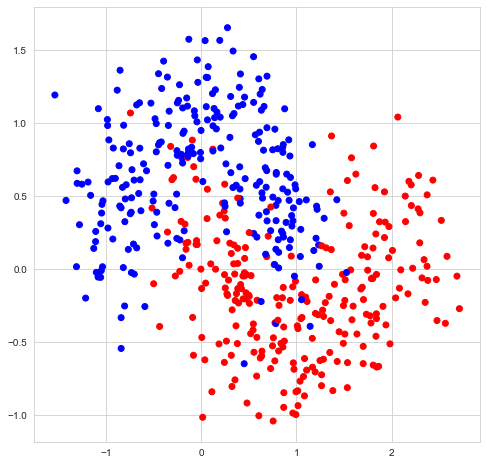

In [183]:
plt.scatter(X[:, 0], X[:, 1], color=np.array(['blue', 'red'])[y]);

In [186]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

[0, 0.5, 1]


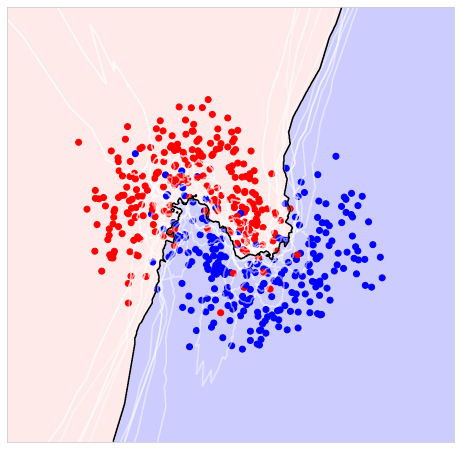

In [187]:
plot_2d_separator(classifier=model, X=X, fill=True, twocolor=True);
plt.scatter(X[:, 0], X[:, 1], color=np.array(['red', 'blue'])[y]);

In [150]:
from mlxtend.plotting import plot_decision_regions

In [165]:
from sklearn.datasets import make_moons

In [ ]:
%%time
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
model = model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
ax[0, 0].set_title(1);
plot_decision_regions(X=X, y=y, clf=model, ax=ax[0, 0]);

model = model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)
ax[0, 1].set_title(2);
plot_decision_regions(X=X, y=y, clf=model, ax=ax[0, 1]);

model = model = KNeighborsClassifier(n_neighbors=10)
model.fit(X, y)
ax[1, 0].set_title(3);
plot_decision_regions(X=X, y=y, clf=model, ax=ax[1, 0]);

model = model = KNeighborsClassifier(n_neighbors=40)
model.fit(X, y)
ax[1, 1].set_title(4);
plot_decision_regions(X=X, y=y, clf=model, ax=ax[1, 1]);

[0, 0.5, 1]
[0, 0.5, 1]
[0, 0.5, 1]
[0, 0.5, 1]
CPU times: user 15.9 s, sys: 1.95 s, total: 17.9 s
Wall time: 17.4 s


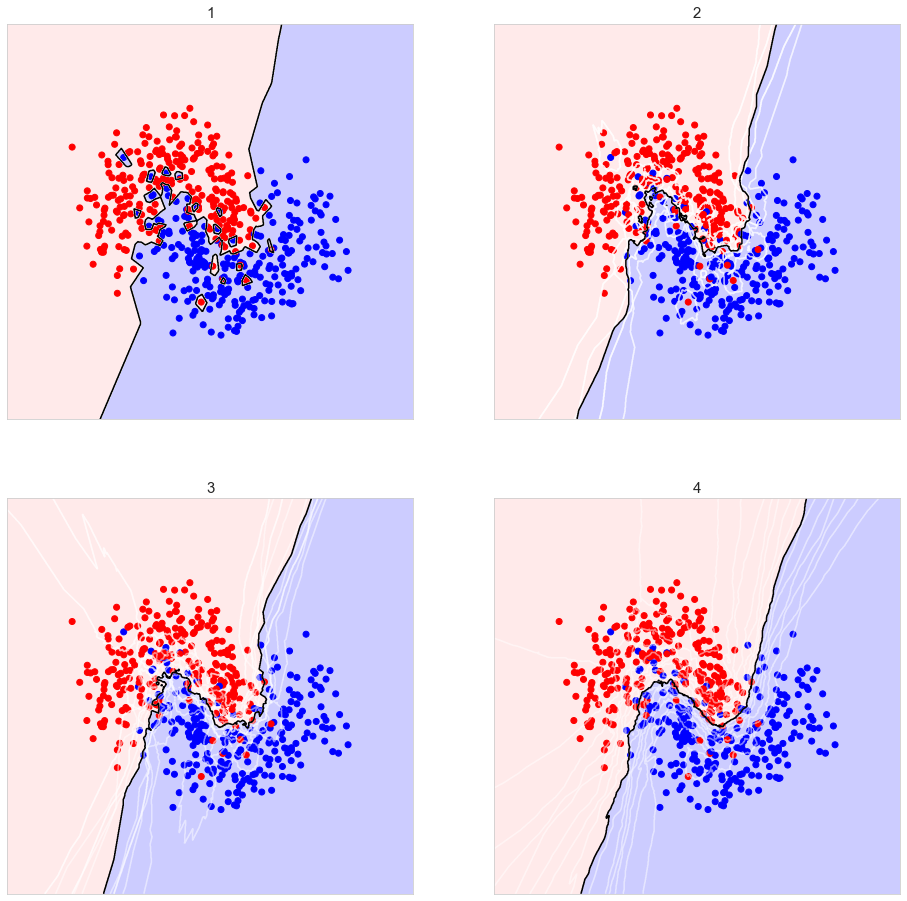

In [194]:
%%time
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
model = model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
ax[0, 0].set_title(1, fontsize=15);
plot_2d_separator(classifier=model, X=X, fill=True, twocolor=True, ax=ax[0, 0]);
ax[0, 0].scatter(X[:, 0], X[:, 1], color=np.array(['red', 'blue'])[y]);

model = model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)
ax[0, 1].set_title(2, fontsize=15);
plot_2d_separator(classifier=model, X=X, fill=True, twocolor=True, ax=ax[0, 1]);
ax[0, 1].scatter(X[:, 0], X[:, 1], color=np.array(['red', 'blue'])[y]);


model = model = KNeighborsClassifier(n_neighbors=10)
model.fit(X, y)
ax[1, 0].set_title(3, fontsize=15);
plot_2d_separator(classifier=model, X=X, fill=True, twocolor=True, ax=ax[1, 0]);
ax[1, 0].scatter(X[:, 0], X[:, 1], color=np.array(['red', 'blue'])[y]);

model = model = KNeighborsClassifier(n_neighbors=40)
model.fit(X, y)
ax[1, 1].set_title(4, fontsize=15);
plot_2d_separator(classifier=model, X=X, fill=True, twocolor=True, ax=ax[1, 1]);
ax[1, 1].scatter(X[:, 0], X[:, 1], color=np.array(['red', 'blue'])[y]);

In [199]:
(5 + 4 * Fraction(2, 3) + 2 * Fraction(1, 3)) / (1 + Fraction(2, 3) + Fraction(1, 3))

Fraction(25, 6)

In [245]:
def make_minkowski_circle(point, p=2, radius=1, **kwargs):
    
    x_dom = np.linspace(point[0] - radius, point[0] + radius, 100)
    
    y_vals = ( radius**p - np.abs((x_dom - point[0]))**p  )**(1 / p)
    
    plt.plot(x_dom, point[1] + y_vals, color='black');
    plt.plot(x_dom, point[1] - y_vals, color='black');
    plt.scatter([point[0]], [point[1]], **kwargs)

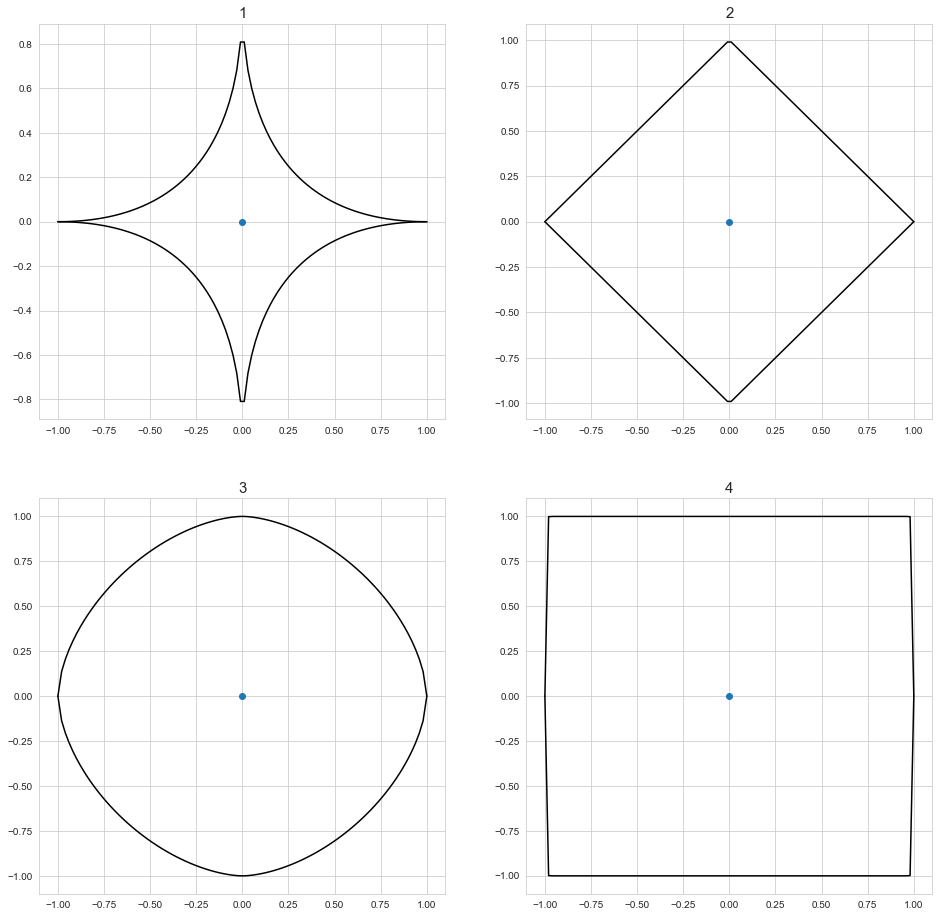

In [261]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

radius = 1
point = [0, 0]
p = 0.5
x_dom = np.linspace(point[0] - radius, point[0] + radius, 100)
y_vals = ( radius**p - np.abs((x_dom - point[0]))**p  )**(1 / p)

ax[0, 0].set_title(1, fontsize=15);
ax[0, 0].plot(x_dom, point[1] + y_vals, color='black');
ax[0, 0].plot(x_dom, point[1] - y_vals, color='black');
ax[0, 0].scatter([point[0]], [point[1]])

p = 1
x_dom = np.linspace(point[0] - radius, point[0] + radius, 100)
y_vals = ( radius**p - np.abs((x_dom - point[0]))**p  )**(1 / p)

ax[0, 1].set_title(2, fontsize=15);
ax[0, 1].plot(x_dom, point[1] + y_vals, color='black');
ax[0, 1].plot(x_dom, point[1] - y_vals, color='black');
ax[0, 1].scatter([point[0]], [point[1]])

p = 1.7
x_dom = np.linspace(point[0] - radius, point[0] + radius, 100)
y_vals = ( radius**p - np.abs((x_dom - point[0]))**p  )**(1 / p)

ax[1, 0].set_title(3, fontsize=15);
ax[1, 0].plot(x_dom, point[1] + y_vals, color='black');
ax[1, 0].plot(x_dom, point[1] - y_vals, color='black');
ax[1, 0].scatter([point[0]], [point[1]])


p = 100
x_dom = np.linspace(point[0] - radius, point[0] + radius, 100)
y_vals = ( radius**p - np.abs((x_dom - point[0]))**p  )**(1 / p)

ax[1, 1].set_title(4, fontsize=15);
ax[1, 1].plot(x_dom, point[1] + y_vals, color='black');
ax[1, 1].plot(x_dom, point[1] - y_vals, color='black');
ax[1, 1].scatter([point[0]], [point[1]])

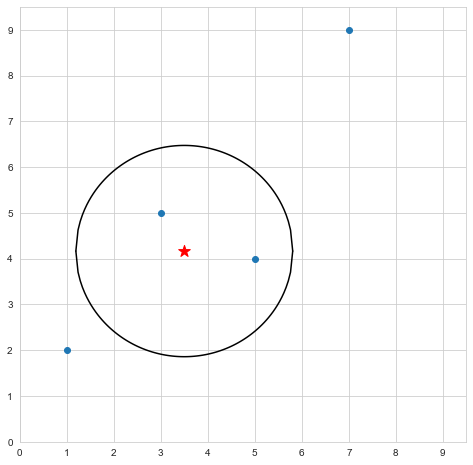

In [213]:
x_dom = np.linspace(3.5 - 2.3075388309006493, 3.5 + 2.3075388309006493, 100)
plt.scatter([1, 3, 5, 7], [2, 5, 4, 9]);
plt.scatter([3.5], [25/6], color='red', marker='*', s=150);
plt.plot(x_dom, 25/6 + np.sqrt(2.3075388309006493**2 - (x_dom - 3.5)**2), color='black')
plt.plot(x_dom, 25/6 - np.sqrt(2.3075388309006493**2 - (x_dom - 3.5)**2), color='black')
plt.xlim(0, 9.5)
plt.ylim(0, 9.5);
plt.xticks(np.arange(10))
plt.yticks(np.arange(10));


In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold


N_FOLDS = 5
n_neighbours = []
mean_score = []
for k in range(1, 100):
    
    model = KNeighborsClassifier(n_neighbors=k)
    
    cross_score = cross_val_score(estimator=model, X=X, y=y, cv=KFold(n_splits=N_FOLDS, shuffle=True))
    
    mean_score.append(np.mean(cross_score))
    n_neighbours.append(k)
    
optimal_n_neighbours = np.array(n_neighbours)[np.argmax(mean_score)]


1)
```python
model = KNeighborsClassifier(n_neighbors=k)
```


2)
```python
N_FOLDS = 5
n_neighbours = []
mean_score = []
```


3)
```python
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
```

4)
```python
optimal_n_neighbours = np.array(n_neighbours)[np.argmax(mean_score)]
```

5)
```python
mean_score.append(np.mean(cross_score))
n_neighbours.append(k)
```

6)
```python
cross_score = cross_val_score(estimator=model, X=X, y=y, cv=KFold(n_splits=N_FOLDS, shuffle=True))
```

7)
```python
for k in range(1, 100):
```